# Ways to generate random points on a sphere

In [1]:
#All necesary import
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sys.path.append('../')
import ten

## On the surface

The intuitive way but... **don't work**

Reference : 
* http://mathworld.wolfram.com/SpherePointPicking.html
* https://en.wikibooks.org/wiki/Mathematica/Uniform_Spherical_Distribution

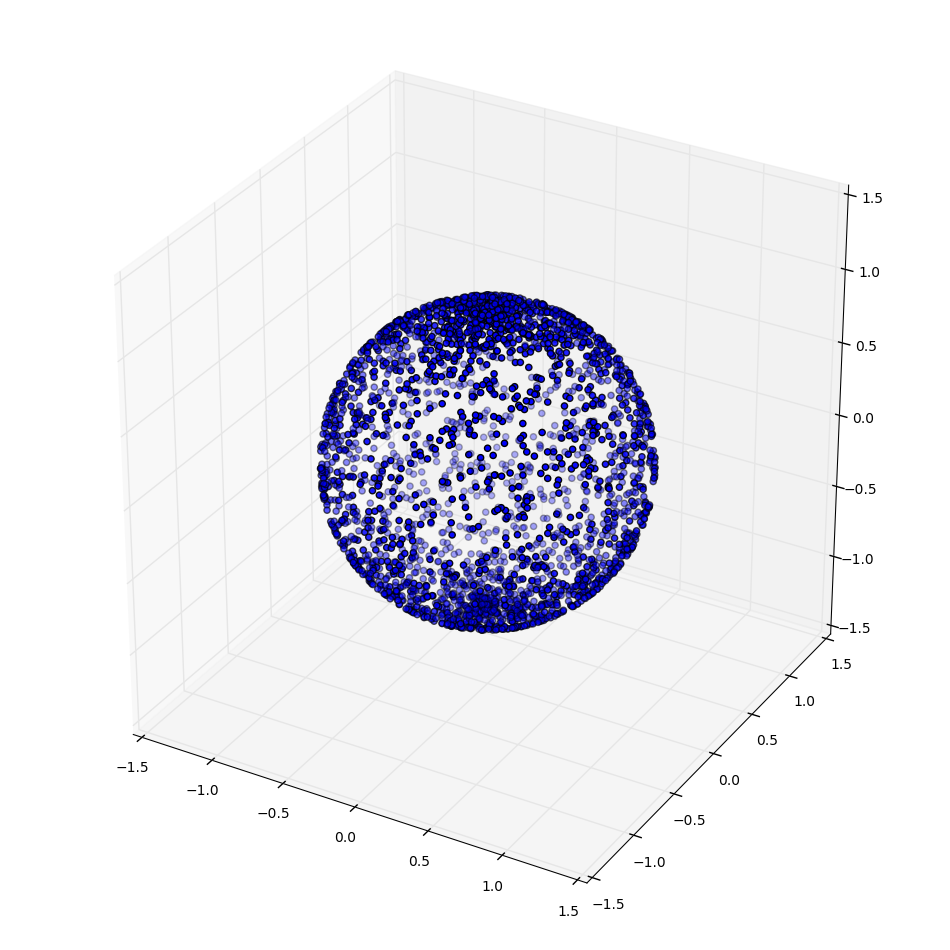

In [2]:
n = 3000
R = 5

theta = np.random.uniform(low = 0, high = 2*np.pi, size = n)
phi = np.random.uniform(low = 0, high = np.pi, size = n)

x = np.sin(phi)*np.cos(theta)
y = np.sin(phi)*np.sin(theta)
z = np.cos(phi)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

Note the large number of dots in the poles, there is no uniform distriución.

### The right way

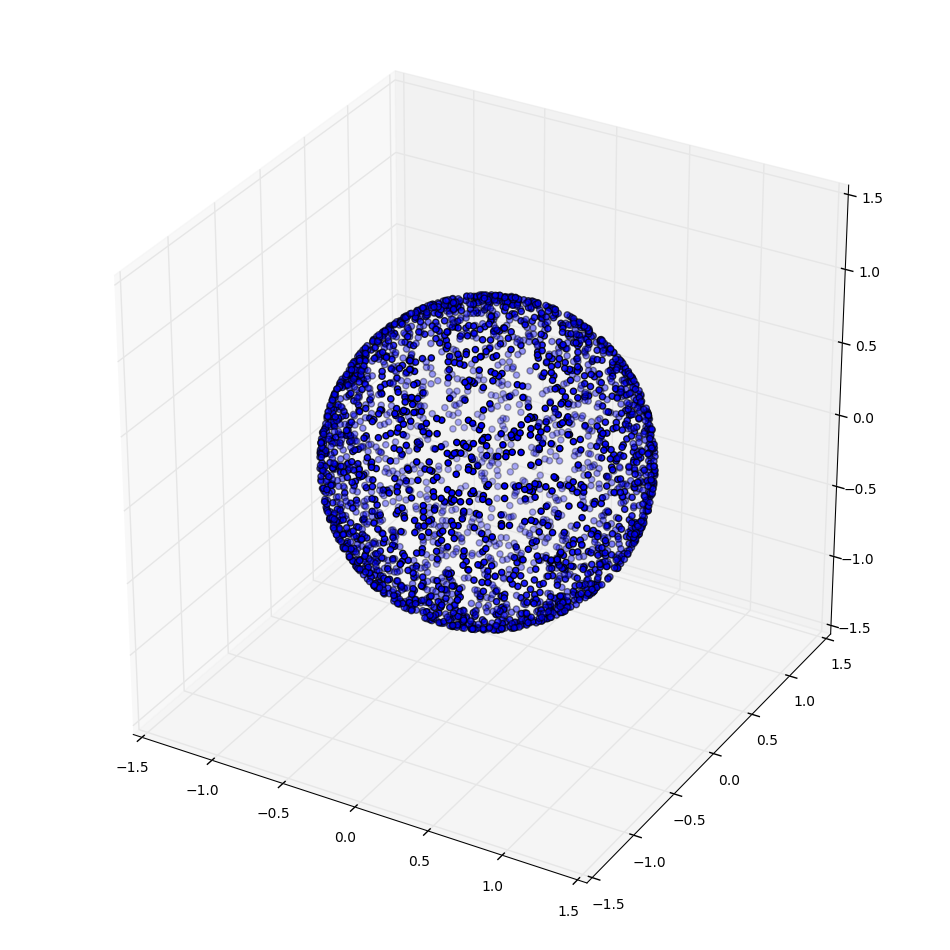

In [3]:
n = 3000
theta = 2*np.pi*np.random.uniform(size=n)
phi = np.arccos(2*np.random.uniform(size=n) - 1)

x = np.sin(phi)*np.cos(theta)
y = np.sin(phi)*np.sin(theta)
z = np.cos(phi)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

Now we have a uniform distribution.But, what if we want to generate inside the sphere?

## Inside the sphere
### The wrong way 

The above code, we add that the radius is variable.

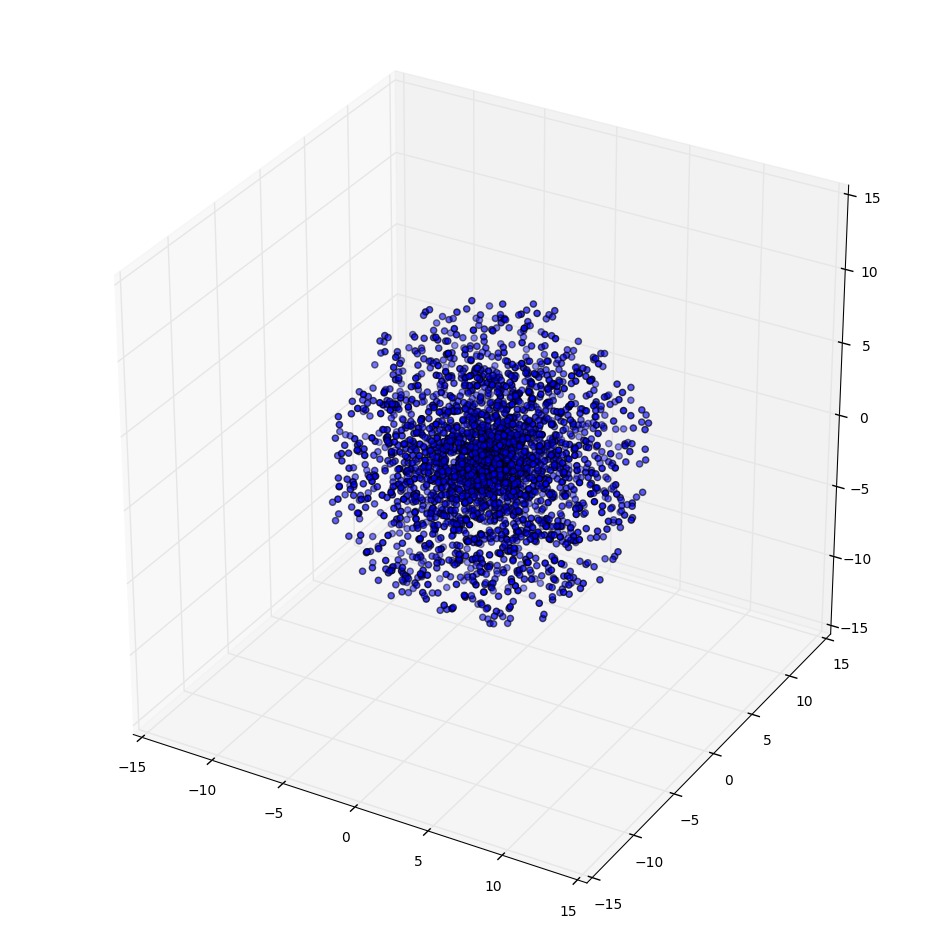

In [4]:
n = 3000
theta = 2*np.pi*np.random.uniform(size=n)
phi = np.arccos(2*np.random.uniform(size=n) - 1)

#theta = np.random.uniform(low=0, high=2*np.pi, size=n)
#phi = np.arcsin(2 * np.random.uniform(low=0, high=2*np.pi, size=n) - 1)
u = np.random.uniform(low=0, high=10, size=n)

x = np.sin(phi)*np.cos(theta)*u
y = np.sin(phi)*np.sin(theta)*u
z = np.cos(phi)*u

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

Obviously there is not a uniform distribution

### The trivial way, with a if...

time = 0.20170927047729492


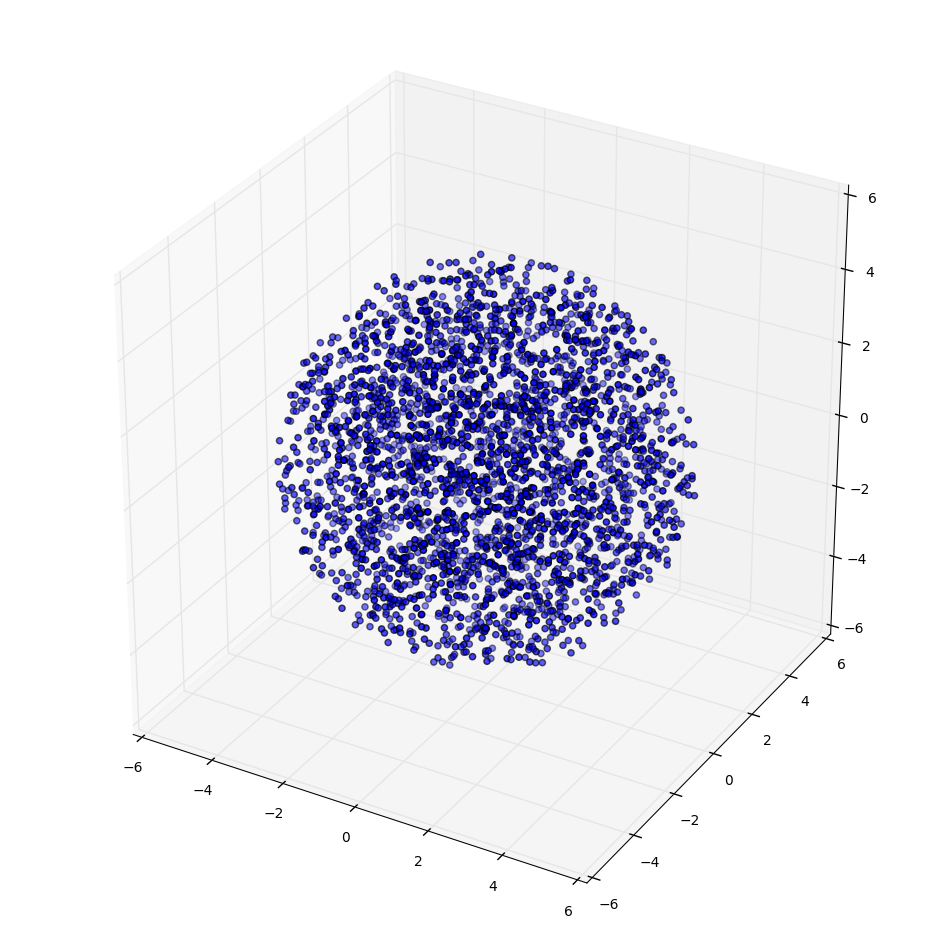

In [5]:
n = 3000 
R = 5
a = 0

x_l = []
y_l = []
z_l = []

t = time.time()

while a <= n:
    x = np.random.uniform(low=-R, high=R, size=1)
    y = np.random.uniform(low=-R, high=R, size=1)
    z = np.random.uniform(low=-R, high=R, size=1)
    if x*x + y*y + z*z <= R*R:
        a += 1
        x_l.append(x)
        y_l.append(y)
        z_l.append(z)

print("time =",time.time() - t)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_l, y_l, z_l)

This way it works but uses an if, which makes it extremely slow.

### The efficient way
Thaks to Nate Eldredge to this solution in [math.stackexchange](https://math.stackexchange.com/questions/87230/picking-random-points-in-the-volume-of-sphere-with-uniform-probability)

Let's say your sphere is centered at the origin $(0,0,0)$. For the distance $D$ from the origin of your random pointpoint, note that you want $P(D≤r)=(\frac{r}{R_s})^3$. Thus if $U$ is uniformly distributed between 0 and 1, taking $D=R_sU^{1/3}$ will do the trick.
For the direction, a useful fact is that if $X_1$,$X_2$,$X_3$ are independent normal random variables with mean 0 and variance 1, then $$\frac{1}{\sqrt{X_1^2+X_2^2+X_3^2}}(X_1,X_2,X_3)$$
Is uniformly distributed on (the surface of) the unit sphere. You can generate normal random variables from uniform ones in various ways; the [Box-Muller algorithm](http://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) is a nice simple approach.

So then $$\frac{R_s U^{1/3}}{\sqrt{X_1^2+X_2^2+X_3^2}}(X_1,X_2,X_3)$$

would produce a uniformly distributed point inside the ball of radius $Rs$.

time = 0.0034797191619873047


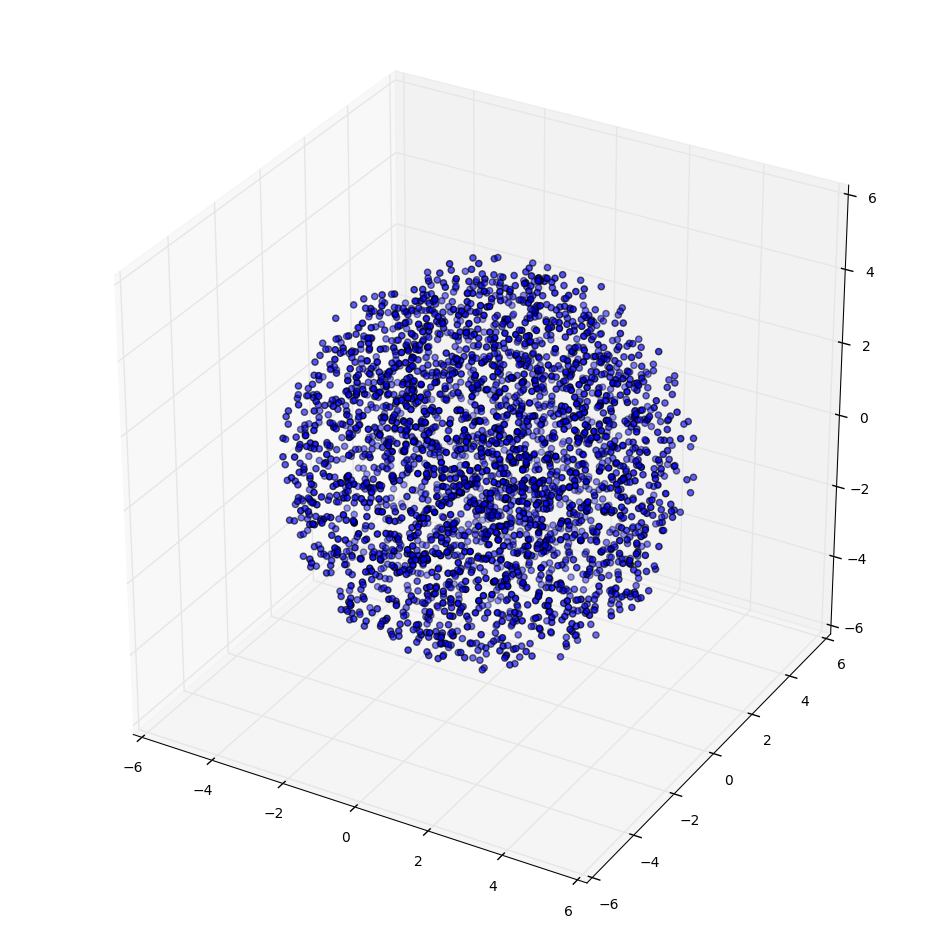

In [6]:
n_points = 3000
R = 5
r = 0

t = time.time()

U = np.random.random(n_points)
uniform_between_R_r = (R - r) * U**(1/3) + r

X = np.random.randn(n_points, 3)
randoms_versors = (np.sqrt(X[:, 0]**2 + X[:, 1]**2 + X[:, 2]**2))**(-1) * X.T

points = randoms_versors * uniform_between_R_r

print("time =", time.time() - t)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[0,:], points[1,:], points[2,:])

In [7]:
aceptors = list(range(1000, 10001, 1000)) + list(range(10000, 100000, 10000)) + list(range(100000, 300000, 100000))
slower = []
faster = []

R = 5
r = 0

for aceptor in aceptors:
    t = time.time()
    
    a = 0
    
    while a <= aceptor:
        x = np.random.uniform(low=-R, high=R, size=1)
        y = np.random.uniform(low=-R, high=R, size=1)
        z = np.random.uniform(low=-R, high=R, size=1)
        if x*x + y*y + z*z <= R*R:
            a += 1
            x_l.append(x)
            y_l.append(y)
            z_l.append(z)
    slower.append(time.time() - t)
    
    t = time.time()
    n_points = aceptor
    
    U = np.random.random(n_points)
    uniform_between_R_r = (R - r) * U**(1/3) + r

    X = np.random.randn(n_points, 3)
    randoms_versors = (np.sqrt(X[:, 0]**2 + X[:, 1]**2 + X[:, 2]**2))**(-1) * X.T

    points = randoms_versors * uniform_between_R_r

    faster.append(time.time() - t)

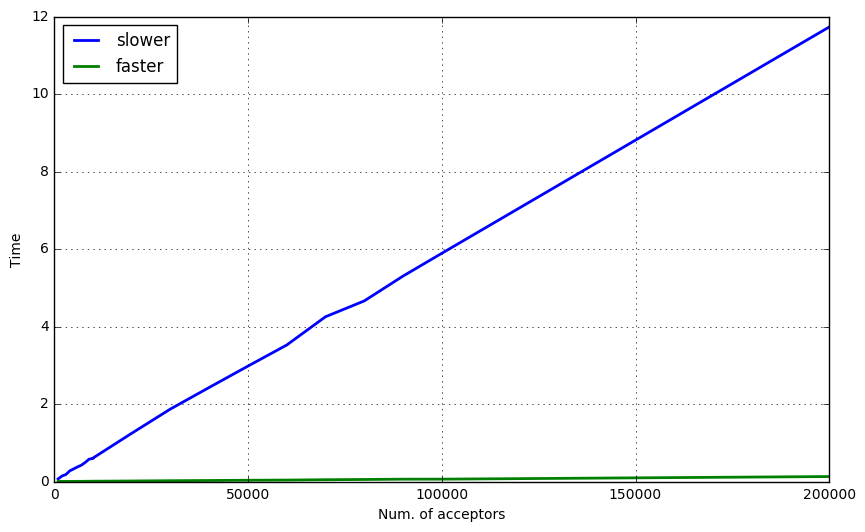

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(aceptors, slower, aceptors, faster, linewidth=2)
plt.legend(['slower', 'faster'], loc=0)
plt.xlabel('Num. of acceptors')
plt.ylabel('Time')
plt.grid()

The question is: this code is quicker?

In [10]:
num_points = 300000

t = time.time()
points = ten.random.points_in_sphere(num_points, 5)
print("time =", time.time() - t)

time = 0.7887814044952393


The version with the if take 0.13 second with 3000 points.This vercion take 0.19 with 300000!! 2 orders of magnitude difference.

## Points between two radios

time = 0.003314971923828125


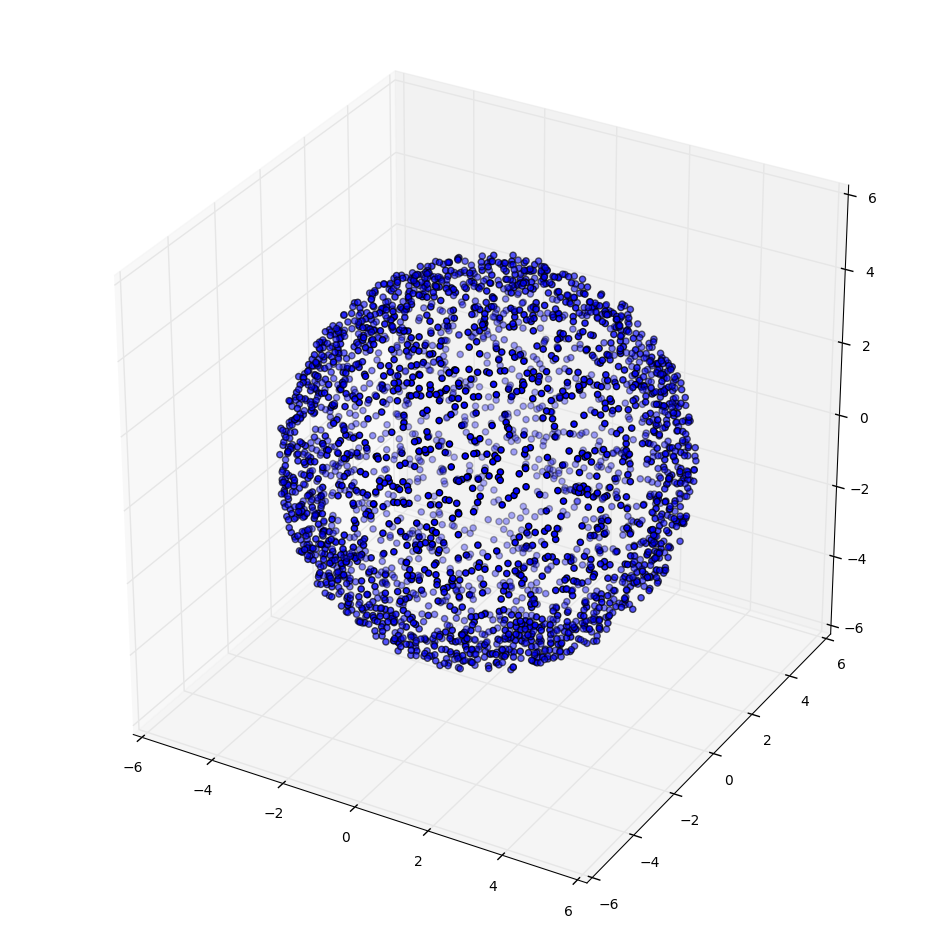

In [11]:
num_points = 3000

t = time.time()

points = ten.random.points_in_sphere(num_points, 5, 4)

print("time =", time.time() - t)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2])

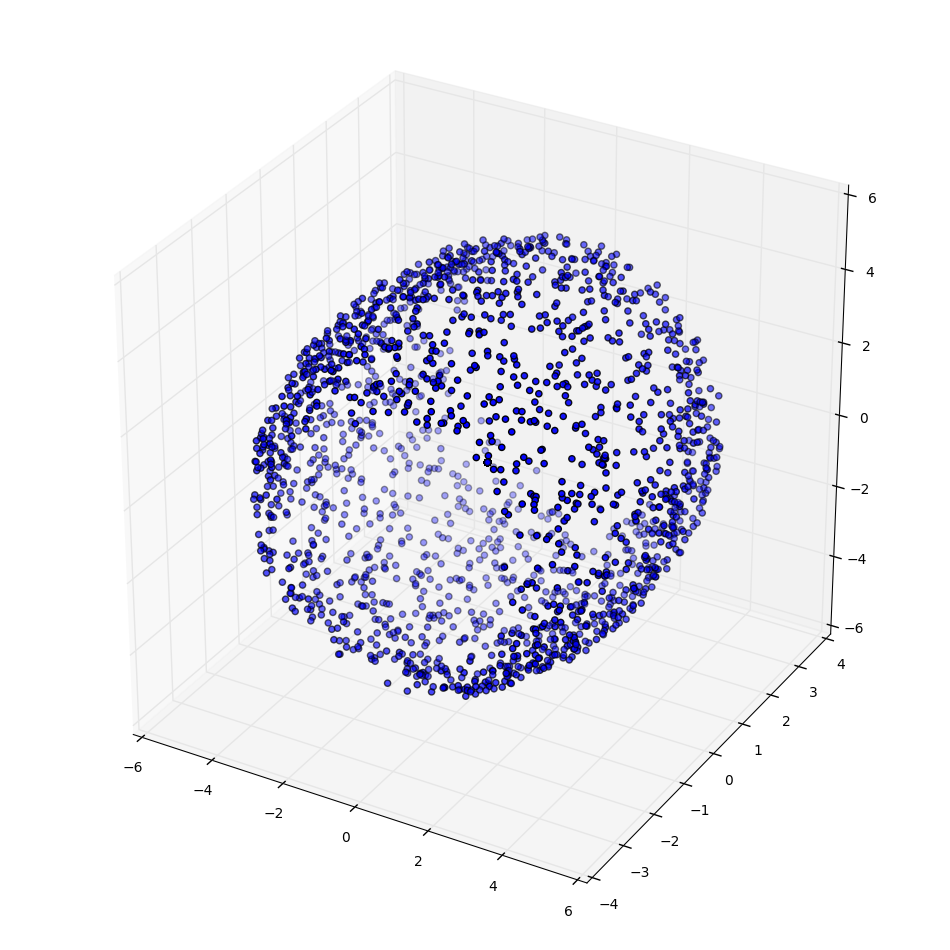

In [12]:
num_points = 3000

points = ten.random.points_in_sphere(num_points, 5, 4)
mid_points = np.zeros_like(points)
for i in range(3000):
    if points[i, 1] < 3 and points[i,1] > -3:
        mid_points[i]  = points[i]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(mid_points[:,0], mid_points[:,1], mid_points[:,2])

In [13]:
#Este css es trabajo de @LorenaABarba y su grupo
from IPython.core.display import HTML
css_file = 'css/personal.css'
HTML(open(css_file, "r").read())

##### Licencia
El código esta licenciado bajo MIT.

La documentación bajo:

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">TEN</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Laboratorio de Microscopia Óptica Avanzada - UNRC</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/pewen/ten" rel="dct:source">https://github.com/pewen/ten</a>